# Introduction to Python Day 2
## Workbook Contents <a id = 'cont'></a>
1. [Example - Web Scraping](#1)
2. [Example - Mars weather API](#2)
3. [Case study - Retrieve JSON data from API](#3)
4. [Example - Basic matplotlib](#4)
5. [Case study - Free choice visualisation](#5)
6. [Exercise - DataFrame to SQL](#6)

## 1. Example - Web scraping<a id = '1'></a>
[Back to contents](#cont)


In [1]:
# required modules
import requests

#a url we are interested in
test_url = r'https://www.ft.com/'

# use requests module to send a request
page = requests.get(test_url)

# check the status code of the request (starting with 2 is good, 4& 5 are bad..)
page.status_code

200

In [2]:
# check the first chunk of html code that was returned
page.text[0:500]

'<!DOCTYPE html><html lang="en-GB" class="no-js core o-typography--loading-sans o-typography--loading-sans-bold o-typography--loading-display o-typography--loading-display-bold" data-o-component="o-typography" style="overflow-x:hidden;background-color:#fff1e5;color:#33302e"><head><meta charSet="utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=edge"/><meta name="viewport" content="width=device-width, initial-scale=1"/><title>Financial Times</title><meta name="description" content="News, anal'

In [4]:
from bs4 import BeautifulSoup

# use beautiful soup to format this
soup = BeautifulSoup(page.text, 'html.parser')
# friendly screen print format
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js core o-typography--loading-sans o-typography--loading-sans-bold o-typography--loading-display o-typography--loading-display-bold" data-o-component="o-typography" lang="en-GB" style="overflow-x:hidden;background-color:#fff1e5;color:#33302e">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Financial Times
  </title>
  <meta content="News, analysis and comment from the Financial Times, the world's leading global business publication" name="description"/>
  <meta content="index,follow,max-snippet:200,max-image-preview:large" name="robots"/>
  <meta content="4-t8sFaPvpO5FH_Gnw1dkM28CQepjzo8UjjAkdDflTw" name="google-site-verification"/>
  <script type="application/ld+json">
   {"@context":"http://schema.org","@type":"WebSite","name":"Financial Times","alternateName":"FT.com","url":"http://www.ft.com"}
  </script>
  <meta content="8

In [5]:
# looks better - now let's look for certain characteristics
# e.g. I know from investigating that linked headlines are tagged with <a>
# and class = 'js_teaser-heading-link

# let's find all instances like this:
found_list = soup.find_all('a', class_ = 'js-teaser-heading-link')

# list comprehension to create a list of just headline text
headline_list = [i.contents[0] for i in found_list]

# use pprint module to nicely print this list
from pprint import pprint
pprint(headline_list)


['UK strikes ‘historic’ trade deal with Japan',
 'Kim Darroch: ‘I thought it would be trial by tweet’',
 'Coronavirus latest: US consumer prices rise for third month as demand picks '
 'up',
 'New Covid cases in England doubling every 7-8 days',
 'Sunak gives himself option of postponing autumn Budget',
 'Rio Tinto CEO quits after backlash over Aboriginal site destruction',
 'Bankruptcy, jail, ruined lives: inside the Post Office scandal',
 'Is China the closest thing to investing normality now? ',
 'Young people want to let off steam, not kill their grans',
 'Brexit tensions give sterling its worst week since March',
 'ECB chief economist warns against complacency over recovery',
 'Jane Fraser seeks to tame the Citigroup ‘beast’',
 'Anders Tegnell and the Swedish Covid experiment',
 'UK economy grows 6.6% in July as coronavirus restrictions eased',
 'Covid vaccine becomes divisive issue in US election campaign',
 'Coronavirus tracked: the latest figures as countries fight Covid-19 '
 

## 2. Example - Mars weather API<a id = '2'></a>
[Back to contents](#cont)


In [6]:
import requests

# using bare url with key embedded
url = 'https://api.nasa.gov/insight_weather/?api_key=LtPq1YXjShLrSdmJtYPe0XANbCnTRhrK5vfK0sls&feedtype=json'

# make the request and store in response object
response = requests.get(url)

#check status code
response.status_code

200

In [67]:
# look at the data we have returned
response.json() 

{'634': {'AT': {'av': -61.082, 'ct': 314284, 'mn': -94.58, 'mx': -16.136},
  'First_UTC': '2020-09-07T15:29:16Z',
  'HWS': {'av': 6.685, 'ct': 156912, 'mn': 0.452, 'mx': 17.887},
  'Last_UTC': '2020-09-08T16:08:49Z',
  'PRE': {'av': 775.846, 'ct': 159956, 'mn': 746.3902, 'mx': 793.7311},
  'Season': 'summer',
  'WD': {'0': {'compass_degrees': 0.0,
    'compass_point': 'N',
    'compass_right': 0.0,
    'compass_up': 1.0,
    'ct': 2564},
   '1': {'compass_degrees': 22.5,
    'compass_point': 'NNE',
    'compass_right': 0.382683432365,
    'compass_up': 0.923879532511,
    'ct': 276},
   '10': {'compass_degrees': 225.0,
    'compass_point': 'SW',
    'compass_right': -0.707106781187,
    'compass_up': -0.707106781187,
    'ct': 19576},
   '11': {'compass_degrees': 247.5,
    'compass_point': 'WSW',
    'compass_right': -0.923879532511,
    'compass_up': -0.382683432365,
    'ct': 2470},
   '12': {'compass_degrees': 270.0,
    'compass_point': 'W',
    'compass_right': -1.0,
    'compass

In [8]:
# looking at the data there are sol_keys which indicate which 'Martian day'
response.json()["sol_keys"]

['634', '635', '636']

In [86]:
# looks good - let's try to loop over the keys and flatten each day
import pandas as pd

day_dict = {}
# iterate over the key for each day
for day in response.json()['sol_keys']:
    # get data for that day
    day_data = response.json()[day]
    # flatten data for that day and put in dataframe
    df = pd.json_normalize(day_data)
    # store df in dictionary
    day_dict[day] = df
    
    #or in one line
    #day_dict[day] = pd.json_normalize(response.json()[day])

# join our dicts together
pd.concat(day_dict)
    

,,First_UTC,Last_UTC,Season,AT.av,AT.ct,AT.mn,AT.mx,HWS.av,HWS.ct,HWS.mn,...,WD.6.compass_degrees,WD.6.compass_point,WD.6.compass_right,WD.6.compass_up,WD.6.ct,WD.7.compass_degrees,WD.7.compass_point,WD.7.compass_right,WD.7.compass_up,WD.7.ct
634,0,2020-09-07T15:29:16Z,2020-09-08T16:08:49Z,summer,-61.082,314284,-94.580,-16.136,6.685,156912,0.452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
635,0,2020-09-08T16:08:50Z,2020-09-09T16:48:25Z,summer,-60.492,299050,-95.169,-16.453,7.906,148766,0.501,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,0,2020-09-09T16:48:26Z,2020-09-10T17:28:00Z,summer,-61.522,315126,-94.580,-17.111,7.194,157178,0.515,...,135.0,SE,0.707107,-0.707107,6.0,157.5,SSE,0.382683,-0.92388,32.0


## 3. Case Study - retrieve JSON data from API<a id = '3'></a>
[Back to contents](#cont)

<b>Requirement</b>

Retrieve COVID data for the UK from the following url: https://api.covid19api.com/dayone/country/united-kingdom/live and format it into a DataFrame.

Use the <code>pandas</code> and <code>requests</code> modules. You shouldn't need the <code>json</code> module

API documentation can be found here https://documenter.getpostman.com/view/10808728/SzS8rjbc. You can tweak the URL if you want to return a different dataset - just follow the rules listed here.

In [1]:
# your code goes here

## 4. Example - basic matplotlib <a id = '4'></a>
[Back to contents](#cont)

<function matplotlib.pyplot.show(*args, **kw)>

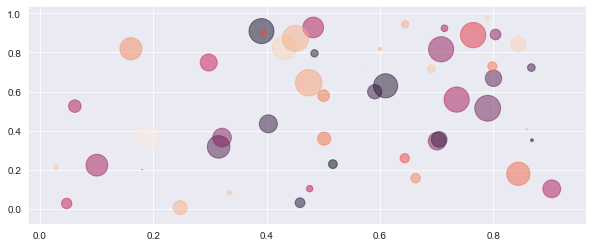

In [126]:
# The following line is only for jupyter notebooks:
%matplotlib inline
# inline doesn't work in an ide for example
"""
Simple demo of a scatter plot.
"""
import numpy as np
import matplotlib.pyplot as plt

# generate some random x,y coords
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

# 0 to 15 point radiuses
# point area based on random
area = np.pi * (15 * np.random.rand(N))**2

#optional step define figure for control on size etc
fig, ax = plt.subplots(figsize = (10,4))

# product plot
ax.scatter(x, y, s=area, c=colors, alpha=0.5)

# display plot
plt.show


## 5. Case study - explore visualisations<a id = '5'></a>
[Back to contents](#cont)

<b>Requirement</b>

Pick a module which we discussed and make a visualisation using the UK COVID dataset retrieved earlier. Matplotlib is easiest - but other modules may produce better visualisations. Make liberal use of google to determine how to make the type of plot you want!

In [98]:
# your code here

## 6. Exercise - DataFrame to SQL<a id = '6'></a>
[Return to contents](#cont)

<b>Requirement</b>
Use the function below (which creates a SQL engine connection based on your Windows AD permissions) to push a sql table to the database using <code>.to_sql()</code>.

<b>N.B.</b>
- Do this in pairs / groups to minimise database load
- BE CAREFUL WITH TABLE NAMES - you may overwrite tables if names clash
- If you have access to a sandbox please use this, otherwise please use common sense
- You must have access to the DB through your Windows permissions or the transfer will fail

Let facilitators know if you want to be added to a sandbox and we can add you to **SERVER_NAME**   **DB_NAME**


In [131]:
# run this to declare the f_connect_sql function
from sqlalchemy import create_engine
from urllib.parse import quote_plus
from sys import exit

def f_connect_sql(server: str, db: str, driver: str = '{ODBC Driver 17 for SQL Server}', dbapi: str = 'mssql+pyodbc:///?odbc_connect='):
    ver_list = ['17','13.1','13','11']
    for i, v in enumerate(ver_list):
        try:
            conn_string = 'DRIVER={ODBC Driver %s for SQL Server};SERVER=%s;DATABASE=%s;Trusted_Connection=Yes;TrustServerCertificate=No;APP={Microsoft® Windows® Operating System}' % (v, server, db)
            conn_url = quote_plus(conn_string)
            engine = create_engine(dbapi+conn_url, echo=False, fast_executemany = True)
            engine.execute('SELECT TOP 1 * FROM sys.Tables')
            print("\nSQL connection succeeded with driver 'ODBC Driver %s for SQL Server'..." %v)
            break
        except:
            if i == len(ver_list) -1:
                print("\nSearch for SQL driver failed - exiting. Refer to additional errors below:\n")
                exit()
            else:
                print("\nSearch for driver 'ODBC Driver %s for SQL Server failed' - reverting to next..." %v)
            
    return engine

In [ ]:
# your code goes here